# Test Notebook for various TIMIT utilities

*read_seg_file()* is a segmentation reading routine included with a lot of other TIMIT related definitions   

TIMIT alphabets:   TIMIT48, TIMIT41, TIMIT61
TIMIT mappings:    timit61_48, timit48_41, timit61_41

tested with v0.6: 07/03/2022, 18/04/2022

In [1]:
# optional install of the pyspch package
#!pip install git+https://github.com/compi1234/pyspch.git

In [2]:
%matplotlib inline
import os,sys,io 
import pkg_resources
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML, clear_output
from ipywidgets import interact

import math,time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import librosa as librosa
    
import pyspch

### Get TIMIT alphabets and conversions with builtin tools

In [3]:
timit41= pyspch.timit.get_timit_alphabet("timit41")
timit61_41 = pyspch.timit.get_timit_mapping("timit61","timit48")
timit41, timit61_41

(['aa',
  'ae',
  'ah',
  'ao',
  'aw',
  'er',
  'ay',
  'b',
  'ch',
  'd',
  'dh',
  'eh',
  'm',
  'ng',
  'ey',
  'f',
  'g',
  'hh',
  'ih',
  'iy',
  'jh',
  'k',
  'l',
  'n',
  'ow',
  'oy',
  'p',
  'r',
  's',
  'sh',
  't',
  'th',
  'uh',
  'uw',
  'v',
  'w',
  'y',
  'z',
  'zh',
  'sil',
  'cl'],
 {'aa': 'aa',
  'ae': 'ae',
  'ah': 'ah',
  'ao': 'ao',
  'aw': 'aw',
  'ax': 'ax',
  'ax-h': 'ax',
  'axr': 'er',
  'ay': 'ay',
  'b': 'b',
  'bcl': 'vcl',
  'ch': 'ch',
  'd': 'd',
  'dcl': 'vcl',
  'dh': 'dh',
  'dx': 'dx',
  'eh': 'eh',
  'el': 'el',
  'em': 'm',
  'en': 'en',
  'eng': 'ng',
  'epi': 'epi',
  'er': 'er',
  'ey': 'ey',
  'f': 'f',
  'g': 'g',
  'gcl': 'vcl',
  'h#': 'sil',
  'hh': 'hh',
  'hv': 'hh',
  'ih': 'ih',
  'ix': 'ix',
  'iy': 'iy',
  'jh': 'jh',
  'k': 'k',
  'kcl': 'cl',
  'l': 'l',
  'm': 'm',
  'n': 'n',
  'ng': 'ng',
  'nx': 'n',
  'ow': 'ow',
  'oy': 'oy',
  'p': 'p',
  'pau': 'sil',
  'pcl': 'cl',
  'q': 'cl',
  'r': 'r',
  's': 's',
  'sh': 

In [4]:
### Predefined symbol sets , e.g. TIMIT61, TIMIT48, TIMIT41  and mappings only dealing with the differences are also directly available
pyspch.timit.TIMIT41, pyspch.timit.timit61_41_diff

(['aa',
  'ae',
  'ah',
  'ao',
  'aw',
  'er',
  'ay',
  'b',
  'ch',
  'd',
  'dh',
  'eh',
  'm',
  'ng',
  'ey',
  'f',
  'g',
  'hh',
  'ih',
  'iy',
  'jh',
  'k',
  'l',
  'n',
  'ow',
  'oy',
  'p',
  'r',
  's',
  'sh',
  't',
  'th',
  'uh',
  'uw',
  'v',
  'w',
  'y',
  'z',
  'zh',
  'sil',
  'cl'],
 {'axr': 'er',
  'em': 'm',
  'eng': 'ng',
  'nx': 'n',
  'hv': 'hh',
  'ux': 'uw',
  'kcl': 'cl',
  'pcl': 'cl',
  'tcl': 'cl',
  'h#': 'sil',
  'pau': 'sil',
  'q': 'sil',
  'bcl': 'cl',
  'dcl': 'cl',
  'gcl': 'cl',
  'epi': 'sil',
  'dx': 't',
  'ax-h': 'ah',
  'ix': 'ih',
  'ax': 'ah',
  'el': 'l',
  'en': 'n'})

### Read data from the 'data' directory included in the package

In [5]:
my_file = pkg_resources.resource_filename('pyspch', 'data/friendly.wrd')
print(my_file)
with open(my_file) as f:
    lines = f.readlines()
lines

c:\users\compi\nextcloud\github\pyspch\pyspch\data\friendly.wrd


['.01 .44 friendly\n', '.49 1.04 computers\n']

## TIMIT Alphabets, Mappings, label2indx, ..

we use following naming conventions

- phone:  name of an element in a phonetic alphabet
- idx:    index of a phone in the alphabet
- map_phn2idx, map_idx2phn:  dictionaries for converting between phone and idx
- seg:    segmentation dataframe
- lbls:   (list) alignment sequence of phone labels
- indx:   (list) alignment sequence of phone indices

In [6]:
# unique phone <--> index mappings
phn_set = np.array(pyspch.timit.get_timit_alphabet("timit41"))
map_idx2phn = {i : phn for i, phn in enumerate(phn_set) }
map_phn2idx = {phn : i for i, phn in enumerate(phn_set) }
map_idx2phn

{0: 'aa',
 1: 'ae',
 2: 'ah',
 3: 'ao',
 4: 'aw',
 5: 'er',
 6: 'ay',
 7: 'b',
 8: 'ch',
 9: 'd',
 10: 'dh',
 11: 'eh',
 12: 'm',
 13: 'ng',
 14: 'ey',
 15: 'f',
 16: 'g',
 17: 'hh',
 18: 'ih',
 19: 'iy',
 20: 'jh',
 21: 'k',
 22: 'l',
 23: 'n',
 24: 'ow',
 25: 'oy',
 26: 'p',
 27: 'r',
 28: 's',
 29: 'sh',
 30: 't',
 31: 'th',
 32: 'uh',
 33: 'uw',
 34: 'v',
 35: 'w',
 36: 'y',
 37: 'z',
 38: 'zh',
 39: 'sil',
 40: 'cl'}

In [7]:
# convert labels to indices usable for slicing
def lbls2indx(lbls,map_phn2idx=None):
    return np.array([ map_phn2idx[phn] for phn in lbls ])
# convert indices to labels for readability
def indx2lbls(indx,map_idx2phn=None):
    return np.array([ map_idx2phn[i] for i in indx ])

In [8]:
indx = [0,3,38,2,2,2,1]
lbls = indx2lbls(indx,map_idx2phn=map_idx2phn)
lbls

array(['aa', 'ao', 'zh', 'ah', 'ah', 'ah', 'ae'], dtype='<U2')

In [9]:
indxx = lbls2indx(lbls,map_phn2idx=map_phn2idx)
indxx

array([ 0,  3, 38,  2,  2,  2,  1])

## Segmentations and Alignments

- segmentation:  contains asynchronous segmentation times and labels
- alignment:     a frame synchronous mapping from index to label

the core package provides conversions  seg2lbls() and lbls2seg()
remark that
    - segmentations can have time gaps with unacounted label information
    - alignments must always be complete

In [10]:
help(pyspch.seg2lbls)

Help on function seg2lbls in module pyspch.core.utils:

seg2lbls(seg, shift=0.01, n_frames=None, end_time=None, pad_lbl=None)
    seg2lbls() converts a segmentation DataFrame to an alignment 
                in the form of an array of labels
                This conversion will fill empty regions with the padding label
                'pad_lbl' and will make an output at least as large as n_frames (or end_time)
    
    Arguments:
    seg      Segmentation DataFrame with columns {'t0','t1','seg'}
    shift    frame shift (in units used in seg)
    n_frames desired number of frames, overrides last value in seg if larger
    end_time desired end time of segmentation, overrides last value in seg if larger
    pad_lbl  a padding label for missing segments (default=None)
    
    Returns:
    lbls[]   list with labels



In [11]:
# read a datafile
dir='https://homes.esat.kuleuven.be/~spchlab/data/'
file = "timit/audio/train/dr1/fcjf0/si1027"
#file = "timit/test/dr1/faks0/si2203" 
sr=16000.
segphn = pyspch.timit.read_seg_file(dir+file+ ".phn",dt=1/sr,fmt='float32',xlat='timit61_41')
segphn

,t0,t1,seg
0,0.000000,0.187125,sil
1,0.187125,0.277500,iy
2,0.277500,0.317500,v
3,0.317500,0.391625,ih
4,0.391625,0.464750,n
5,0.464750,0.647500,eh
6,0.647500,0.771125,n
7,0.771125,0.932500,sil
8,0.932500,0.982500,ih
9,0.982500,1.002563,f


In [12]:
pd.DataFrame(pyspch.seg2lbls(segphn))

,0
0,sil
1,sil
2,sil
3,sil
4,sil
...,...
304,sil
305,sil
306,sil
307,sil


### Reading TIMIT transcriptions files

In [13]:
fn1 = 'timit/audio/train/dr1/fcjf0/sa1.txt'
#fn1="timit/phones-61-48-39-41.txt"
fname='https://homes.esat.kuleuven.be/~spchlab/data/'
transcript = pyspch.read_txt(fname+fn1)[0].strip().split(None,2)
print('Samples: ',int(transcript[0]),int(transcript[1]))
print('Transcript: ',transcript[2].strip('.,!?:;'))

Samples:  0 46797
Transcript:  She had your dark suit in greasy wash water all year


## (TIMIT) Segmentation Files

Segmentation Files are assumed to be in the format

t0  t1   seg    
....


#### time units
t0, t1 are begin and end-times of segment 'seg'
the units of time, can be specified in the read_seg_file() module with 'dt', by default segmentation times are given in seconds;
in timit it is often in samples (with SR=16000), thus use dt=1/16000

#### phonetic symbols
Phonetic transcriptions come in a variety of phonetic symbol sets.
These utilities include default definitions (and orderings) of **TIMIT48** and **TIMIT41**.   TIMIT48 is the default used in experiments with TIMIT.   TIMIT41 is our own more compact version inspired by the alphabet in the CMU dictionaries, with 1 additional closure ('cl') symbol.

A number of mappings between the different alphabets are foreseen.  To apply them use the field 'xlat' at time of reading and specify the desired translation:  timit61_48, timit61_41, ..
These are simple dictionary based mappings.   

In [14]:
# read a datafile
root='https://homes.esat.kuleuven.be/~spchlab/data/'
file = "timit/audio/train/dr1/fcjf0/si1027" #@param {type:"string"}
wavfile = root+file+".wav" 
wavdata, sr = pyspch.audio.load(wavfile)
spg1 = pyspch.sp.spectrogram(wavdata,sample_rate=sr,n_mels=None)

# get segmentations
segwrd = pyspch.timit.read_seg_file(root+file+ ".wrd",dt=1/sr,fmt='float32')
segphn61 = pyspch.timit.read_seg_file(root+file+ ".phn",dt=1/sr,fmt='float32')
segphn = pyspch.timit.read_seg_file(root+file+ ".phn",dt=1/sr,fmt='float32',xlat='timit61_41')

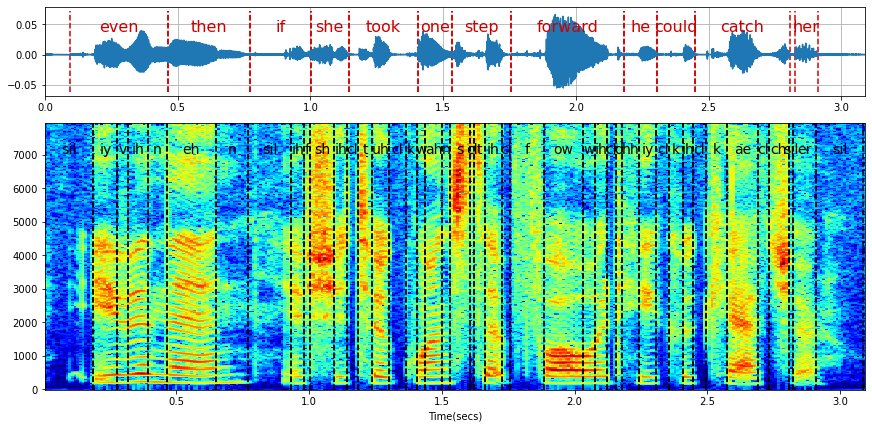

In [15]:
fig = pyspch.display.PlotSpg(spg1,wavdata=wavdata,segwav=segwrd,segspg=segphn,sample_rate=sr)
display(fig)
display(Audio(data=wavdata,rate=sr))